In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Chiptronex\AppData\Local\Temp\ipykernel_5800\3087333056.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Loading and Checking Data

In [2]:
x = np.load("sign-language-digits-dataset/X.npy")
y = np.load("sign-language-digits-dataset/Y.npy")

In [3]:
x.shape

(2062, 64, 64)

* x contains 2062 64x64 images

In [4]:
y.shape

(2062, 10)

* y contains their labels

# Visualizing a Sample of Each Sign

(-0.5, 63.5, 63.5, -0.5)

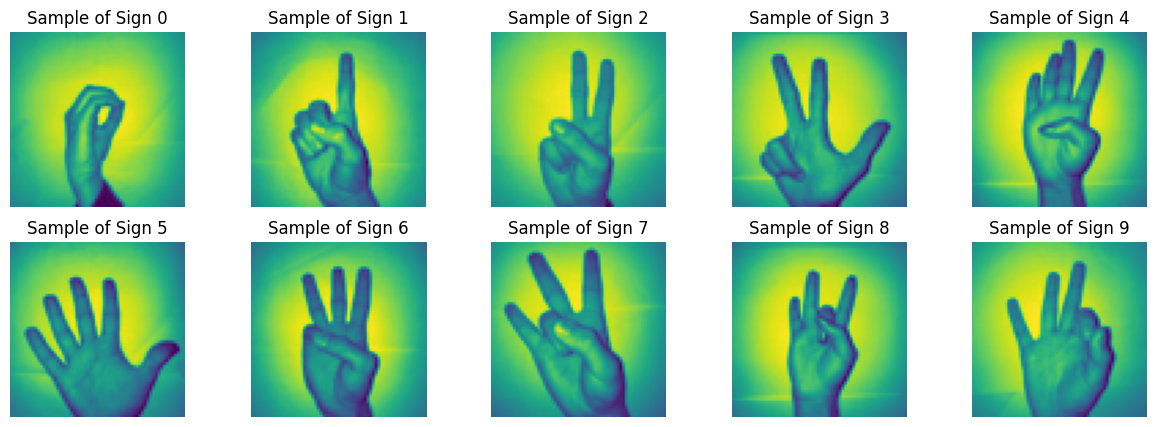

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

plt.subplot(2, 5, 1)
plt.imshow(x[300].reshape(64, 64))
plt.title("Sample of Sign 0")
plt.axis('off')

plt.subplot(2, 5, 2)
plt.imshow(x[900].reshape(64, 64))
plt.title("Sample of Sign 1")
plt.axis('off')

plt.subplot(2, 5, 3)
plt.imshow(x[1700].reshape(64, 64))
plt.title("Sample of Sign 2")
plt.axis('off')

plt.subplot(2, 5, 4)
plt.imshow(x[1500].reshape(64, 64))
plt.title("Sample of Sign 3")
plt.axis('off')

plt.subplot(2, 5, 5)
plt.imshow(x[1300].reshape(64, 64))
plt.title("Sample of Sign 4")
plt.axis('off')

plt.subplot(2, 5, 6)
plt.imshow(x[1900].reshape(64, 64))
plt.title("Sample of Sign 5")
plt.axis('off')

plt.subplot(2, 5, 7)
plt.imshow(x[700].reshape(64, 64))
plt.title("Sample of Sign 6")
plt.axis('off')

plt.subplot(2, 5, 8)
plt.imshow(x[500].reshape(64, 64))
plt.title("Sample of Sign 7")
plt.axis('off')

plt.subplot(2, 5, 9)
plt.imshow(x[1101].reshape(64, 64))
plt.title("Sample of Sign 8")
plt.axis('off')

plt.subplot(2, 5, 10)
plt.imshow(x[100].reshape(64, 64))
plt.title("Sample of Sign 9")
plt.axis('off')

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 17, stratify = y)

# Flattening

In [7]:
x_train_flattened = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_flattened = x_test .reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print("Shape of flattened x_train: ",x_train_flattened.shape)
print("Shape of flattened x_test: ",x_test_flattened.shape)

Shape of flattened x_train:  (1649, 4096)
Shape of flattened x_test:  (413, 4096)


# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_scaled = sc.fit_transform(x_train_flattened)
x_test_scaled = sc.transform(x_test_flattened)

# Reshaping

In [9]:
x_train = x_train_scaled.reshape(-1,64,64,1)
x_test = x_test_scaled.reshape(-1,64,64,1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (1649, 64, 64, 1)
x_test shape:  (413, 64, 64, 1)


# Convolutional Neural Network

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model=Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "same", activation = "relu", input_shape = (64,64,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [12]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(x_train, y_train, epochs = 55, validation_data = (x_test,y_test))

Epoch 1/55


52/52 [==============================] - 8s 85ms/step - loss: 2.1175 - accuracy: 0.3117 - val_loss: 2.1212 - val_accuracy: 0.2494
Epoch 2/55
52/52 [==============================] - 4s 71ms/step - loss: 1.2332 - accuracy: 0.5725 - val_loss: 1.9067 - val_accuracy: 0.2712
Epoch 3/55
52/52 [==============================] - 4s 71ms/step - loss: 0.8864 - accuracy: 0.6877 - val_loss: 1.7792 - val_accuracy: 0.3487
Epoch 4/55
52/52 [==============================] - 4s 71ms/step - loss: 0.7201 - accuracy: 0.7580 - val_loss: 1.1368 - val_accuracy: 0.5230
Epoch 5/55
52/52 [==============================] - 4s 71ms/step - loss: 0.5414 - accuracy: 0.8169 - val_loss: 0.8593 - val_accuracy: 0.7094
Epoch 6/55
52/52 [==============================] - 4s 71ms/step - loss: 0.4154 - accuracy: 0.8599 - val_loss: 0.6816 - val_accuracy: 0.7579
Epoch 7/55
52/52 [==============================] - 4s 71ms/step - loss: 0.3655 - accuracy: 0.8824 - val_loss: 0.4816 - val_accuracy: 0.8644
Epoch 8/55


# Visualization of Results

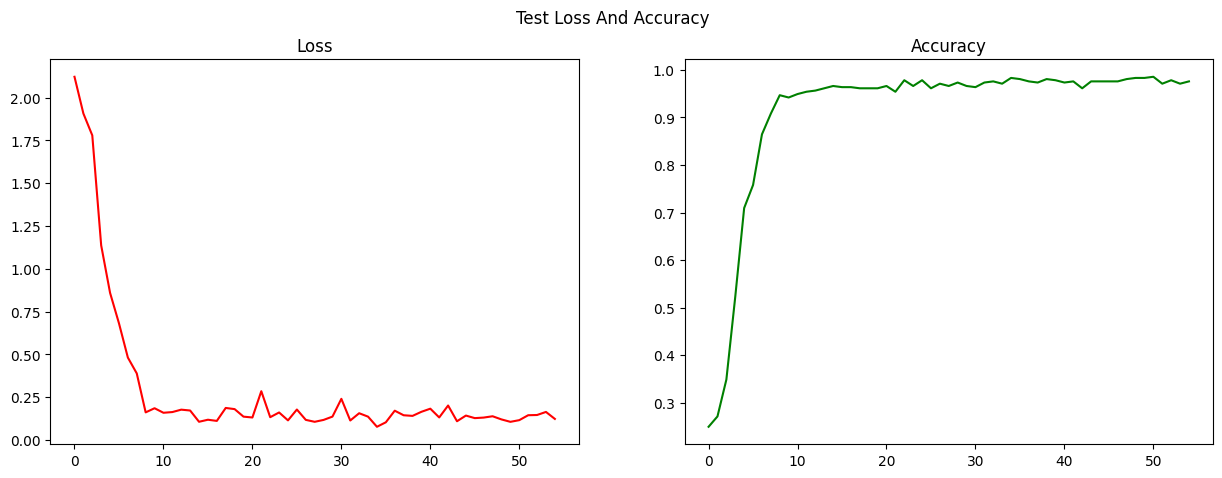

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Test Loss And Accuracy')

sns.lineplot(ax=ax[0], data=history.history['val_loss'], color='r')
ax[0].set_title('Loss')

sns.lineplot(ax=ax[1], data=history.history['val_accuracy'], color='g')
ax[1].set_title('Accuracy')

plt.show()

13/13 [==============================] - 0s 20ms/step


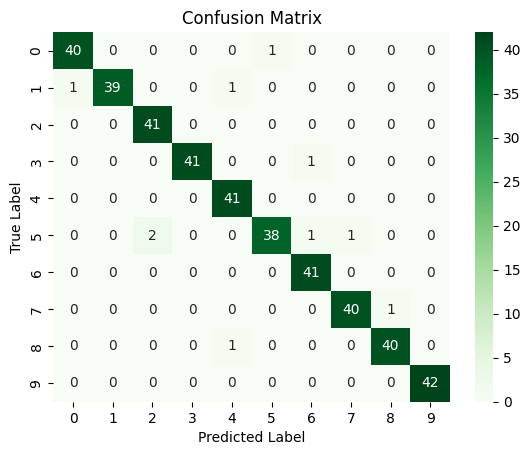

In [15]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
cm = confusion_matrix(y_true, y_pred_classes) 
sns.heatmap(cm, annot=True,cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Save the model
model.save("model_digits.p")


INFO:tensorflow:Assets written to: model_digits.p\assets


INFO:tensorflow:Assets written to: model_digits.p\assets
